In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def filter_non_halu(df, size=1000):
    df1 = df[df['IsHallucination'] == 0][:size]
    df2 = df[df['IsHallucination'] == 1]
    return pd.concat([df1, df2], axis=0)

In [80]:
outputs = []
for ds in ["FEVER", "NHNETtest", "HaluQA", "HaluSum"]: 
    exp_name="_reason_nocategory"
    results_folder = os.path.join('results', 'labeled')
    file = os.path.join(results_folder, "simple_reason_" + ds + exp_name+"_result.csv")
    df = pd.read_csv(file, sep=',')
    print(ds, len(df[df['IsHallucination'] == 0]), len(df))
    inconsistency = len(df[df['GPTJudgement'] == 0]) / len(df)
    outputs.append([ds, 'Vanilla', 0.0, 0.0, inconsistency, 0.0, 0.0])

    exp_name="_reason_nocategory"
    file = os.path.join(results_folder, "reason_" + ds + exp_name+"_result.csv")
    df = pd.read_csv(file, sep=',')
    gr = df.groupby(['GPTJudgement', 'GPTUnknown', "IsHallucination"]).size().reset_index()
    precision = gr[(gr['GPTJudgement'] == 0) & (gr['GPTUnknown'] == 1)][0].sum() / gr[gr['GPTUnknown'] == 1][0].sum()
    recall = gr[(gr['GPTJudgement'] == 0) & (gr['GPTUnknown'] == 1)][0].sum() / gr[gr['GPTJudgement'] == 0][0].sum()

    filtered = gr[gr['GPTUnknown'] == 0]
    inconsistency = filtered[filtered['GPTJudgement'] == 0][0].sum() / filtered[0].sum()
    pre_incon = gr[gr['GPTJudgement'] == 0][0].sum() / gr[0].sum()
    judge_precision =  gr[(gr['GPTUnknown'] == 1) & (gr['IsHallucination'] == 0)][0].sum() / gr[gr['GPTUnknown'] == 1][0].sum()
    judge_recall = gr[(gr['GPTUnknown'] == 1) & (gr['IsHallucination'] == 0)][0].sum() / gr[gr['IsHallucination'] == 0][0].sum()

    outputs.append([ds, 'Fallback', precision, recall, pre_incon, judge_precision, judge_recall])
    outputs.append([ds, 'Fallback Filtered', precision, recall, inconsistency, judge_precision, judge_recall])

    exp_name="_reason_category"
    file = os.path.join(results_folder, "reason_" + ds + exp_name+"_Categoryresult.csv")
    df = pd.read_csv(file, sep=',')
    gr = df.groupby(['GPTJudgement','GPTReasonCategoryLast', 'IsHallucination']).size().reset_index()
    precision = gr[(gr['GPTReasonCategoryLast'] == 12) & (gr['GPTJudgement'] == 0)][0].sum() / gr[gr['GPTReasonCategoryLast'] == 12][0].sum()
    recall = gr[(gr['GPTJudgement'] == 0) & (gr['GPTReasonCategoryLast'] == 12)][0].sum() / gr[gr['GPTJudgement'] == 0][0].sum()
    
    filtered = gr[gr['GPTReasonCategoryLast'] != 12]
    inconsistency = filtered[filtered['GPTJudgement'] == 0][0].sum() / filtered[0].sum()
    pre_incon = gr[gr['GPTJudgement'] == 0][0].sum() / gr[0].sum()
    
    judge_precision =  gr[(gr['GPTReasonCategoryLast'] == 12) & (gr['IsHallucination'] == 0)][0].sum() / gr[gr['GPTReasonCategoryLast'] == 12][0].sum()
    judge_recall = gr[(gr['GPTReasonCategoryLast'] == 12) & (gr['IsHallucination'] == 0)][0].sum() / gr[gr['IsHallucination'] == 0][0].sum()


    outputs.append([ds, 'Categorized', precision, recall, pre_incon, judge_precision, judge_recall])
    outputs.append([ds, 'Categorized Filtered', precision, recall, inconsistency, judge_precision, judge_recall])

    

FEVER 2187 3000
NHNETtest 439 655
HaluQA 1500 3000
HaluSum 1500 3000


In [81]:

df = pd.DataFrame(outputs, columns=["Dataset", "Type", "FilterPrecision", "FilterRecall", "Inconsistency", "JudgePrecision", "JudgeRecall"])
df.loc[df.Dataset == "NHNETtest", "Dataset"] = "NHNET"
df.FilterPrecision = df.FilterPrecision.round(3)
df.FilterRecall = df.FilterRecall.round(3)
df

,Dataset,Type,FilterPrecision,FilterRecall,Inconsistency,JudgePrecision,JudgeRecall
0,FEVER,Vanilla,0.000,0.000,0.252667,0.000000,0.000000
1,FEVER,Fallback,0.997,0.212,0.523863,1.000000,0.155416
2,FEVER,Fallback Filtered,0.997,0.212,0.464467,1.000000,0.155416
3,FEVER,Categorized,1.000,0.997,0.573333,0.992420,0.778235
4,FEVER,Categorized Filtered,1.000,0.997,0.003891,0.992420,0.778235
5,NHNET,Vanilla,0.000,0.000,0.096183,0.000000,0.000000
6,NHNET,Fallback,0.979,0.380,0.184733,0.936170,0.100228
7,NHNET,Fallback Filtered,0.979,0.380,0.123355,0.936170,0.100228
8,NHNET,Categorized,0.998,0.998,0.680916,0.807175,0.820046
9,NHNET,Categorized Filtered,0.998,0.998,0.004785,0.807175,0.820046


In [82]:
# df = pd.DataFrame(outputs, columns=["Dataset", "Type", "FilterPrecision", "FilterRecall", "Inconsistency",  "JudgePrecision", "JudgeRecall"])
# df["InconsistencyReduction"] = df["Inconsistency"] / df["Pre-Filter"]
df1 = df[["Dataset", "Type", "Inconsistency"]]

# df1 = df1[df1['Type'] != "Vanilla"]

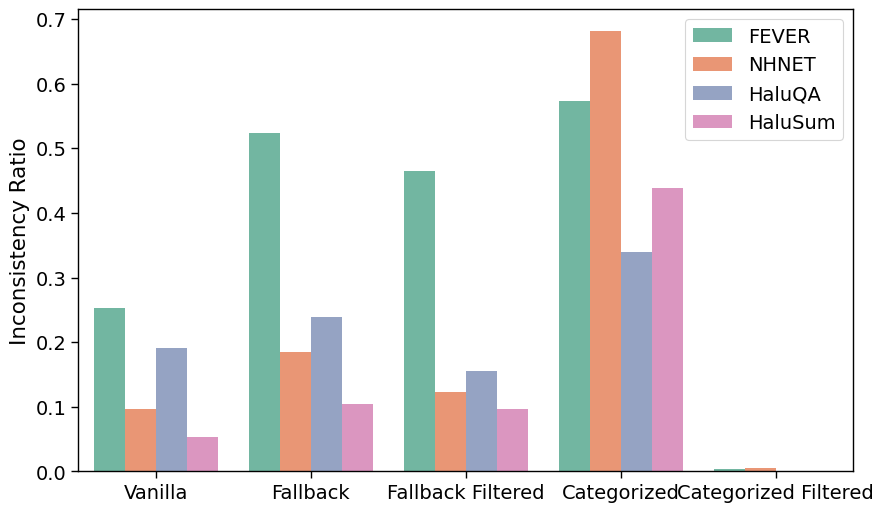

In [87]:
sns.set_palette("Set2")
sns.set_context("paper", font_scale = 1.6)
# plt.figure((12, 6))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(df1, x="Type", y="Inconsistency", hue='Dataset')
plt.xlabel("")
plt.ylabel("Inconsistency Ratio")
plt.legend()

plt.savefig("InconsistencyRatio.png", dpi=300, format='png', bbox_inches = "tight")

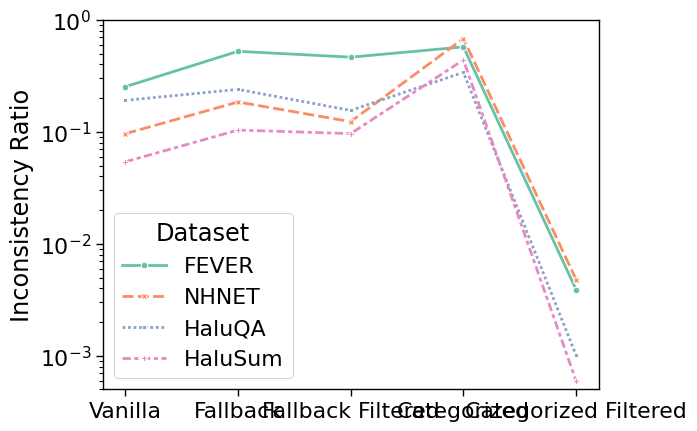

In [85]:
#sns.barplot(df1, x="Type", stacked=True, palette='tab20c', shrink=0.8)
sns.set_context("paper", font_scale = 1.8)
sns.lineplot(data=df, x="Type", y="Inconsistency", hue='Dataset', style='Dataset',markers=True, linewidth=2)
plt.xlabel('')
plt.ylabel('Inconsistency Ratio')
plt.yscale('log')
plt.ylim([5e-4, 1.0])
plt.savefig("Inconsistency.png", dpi=300, format='png', bbox_inches = "tight")

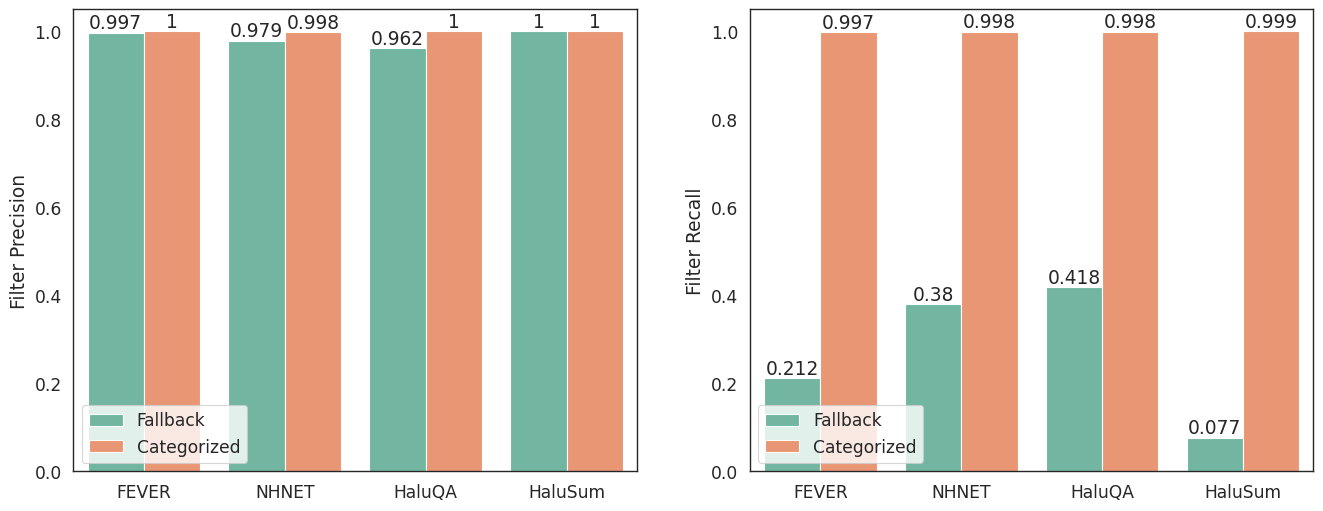

In [5]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.4)
sns.set_palette("Set2")
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt_df = df[df['Type'] != "Vanilla"]

sns.barplot(data=plt_df, x="Dataset", y="FilterPrecision", hue='Type', ax=ax[0])
ax[0].set_xlabel("")
ax[0].legend(loc=3)
ax[0].set_ylabel("Filter Precision")

for i in ax[0].containers:
    ax[0].bar_label(i,)
    
sns.barplot(data=plt_df, x="Dataset", y="FilterRecall", hue='Type', ax=ax[1])
ax[1].set_xlabel("")
ax[1].legend(loc=3)
for i in ax[1].containers:
    ax[1].bar_label(i,)
ax[1].set_ylabel("Filter Recall")  

plt.savefig("FilterResults.png", dpi=300, format='png')

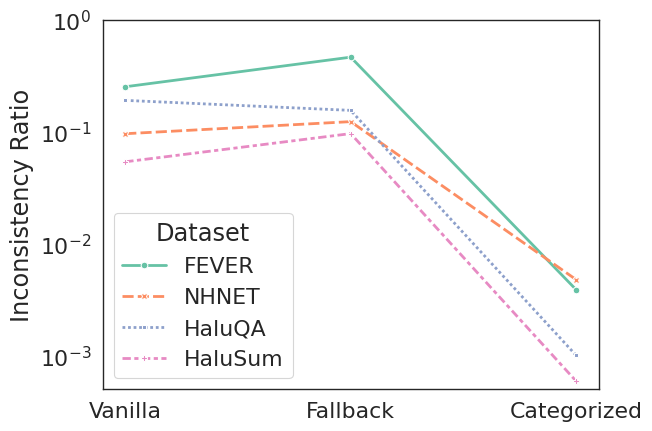

In [11]:
sns.set_context("paper", font_scale = 1.8)
sns.lineplot(data=df, x="Type", y="Inconsistency", hue='Dataset', style='Dataset',markers=True, linewidth=2)
plt.xlabel('')
plt.ylabel('Inconsistency Ratio')
plt.yscale('log')
plt.ylim([5e-4, 1.0])
plt.savefig("Inconsistency.png", dpi=300, format='png', bbox_inches = "tight")

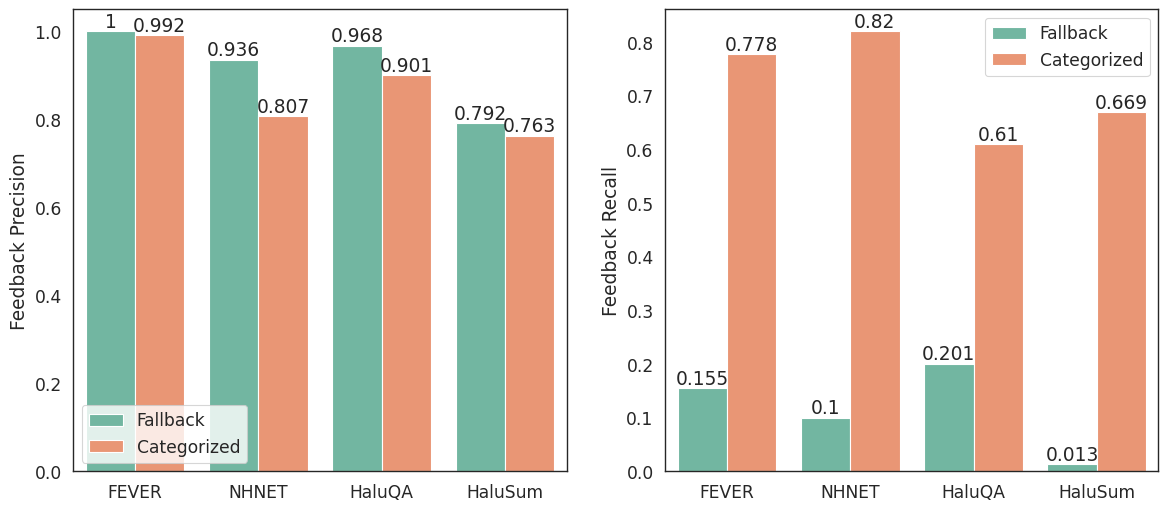

In [7]:
df.JudgePrecision = df.JudgePrecision.round(3)
df.JudgeRecall = df.JudgeRecall.round(3)
plt_df = df[df['Type'] != "Vanilla"]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=plt_df, x="Dataset", y="JudgePrecision", hue='Type', ax=ax[0])
ax[0].set_xlabel("")
ax[0].legend(loc=3)
ax[0].set_ylabel("Feedback Precision")

for i in ax[0].containers:
    ax[0].bar_label(i,)
    
sns.barplot(data=plt_df, x="Dataset", y="JudgeRecall", hue='Type', ax=ax[1])
ax[1].set_xlabel("")
ax[1].legend(loc=1)
for i in ax[1].containers:
    ax[1].bar_label(i,)
ax[1].set_ylabel("Feedback Recall")  

plt.savefig("FeedbackResults.png", dpi=300, format='png')